In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, fftshift

## 1. DFT 1D

#### Mistura de cosenos com ruído
Vamos definir um sinal dado pela mistura de duas funções coseno mais um ruído

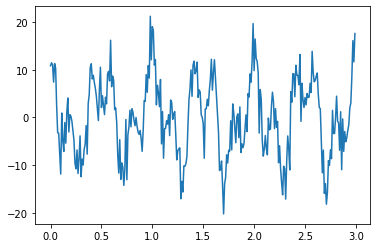

In [2]:
freq_s1 = 2.
freq_s2 = 5.
x = np.arange(0, 3, 0.01)
y = 8*np.cos(2*np.pi*freq_s1*x) + 7*np.cos(2*np.pi*freq_s2*x)
y += 3*np.random.normal(0., 1., x.size)

plt.plot(x, y)

(-10.0, 10.0)

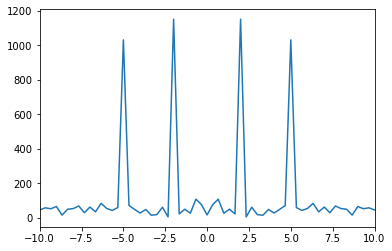

In [3]:
Fy = fft(y)
freqs = fftfreq(len(x), x[1]-x[0])
# Lembrando que a transformada está organizada de acordo com as frequências
# [0, ..., fmax, -fmax, ...]. Para deixarmos o sinal organizado de forma mais
# intuitiva, reordenamos as frequências:
Fy = fftshift(Fy)
freqs = fftshift(freqs)
plt.plot(freqs, np.abs(Fy))
plt.xlim((-10,10))

#### Função caixa

Text(0.5, 1.0, 'Transformada de Fourier')

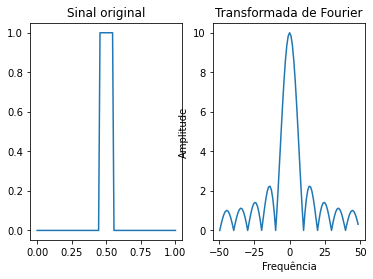

In [4]:
x = np.linspace(0, 1, 100)
y = np.zeros(len(x))
y[45:55] = 1

Fy = fft(y)
freqs = fftfreq(len(x), x[1]-x[0])
Fy = fftshift(Fy)
freqs = fftshift(freqs)

plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.title('Sinal original')
plt.subplot(1, 2, 2)
plt.plot(freqs, np.abs(Fy))
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.title('Transformada de Fourier')

## 2. DFT 2D de um sinal artificial

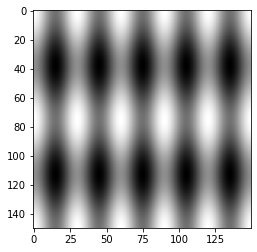

In [5]:
from scipy.fftpack import fft2, fftshift, fftfreq

# Vamos definir uma imagem dada pela mistura de duas funções coseno, 
# cada uma em uma direção (horizontal e vertical), mais um ruído
N = 150
quant_ruido = 0.
freq_r = 2./N    # 2 ciclos de coseno ao longo das linhas
freq_c = 5./N    # 5 ciclos de coseno ao longo das colunas
Z = np.zeros((N, N))
for row in range(N):
    for col in range(N):
        Z[row, col] = 4*np.cos(2*np.pi*freq_r*row) + 5*np.cos(2*np.pi*freq_c*col)
        Z[row, col] += quant_ruido*np.random.normal(0., 1.)
plt.imshow(Z, 'gray')

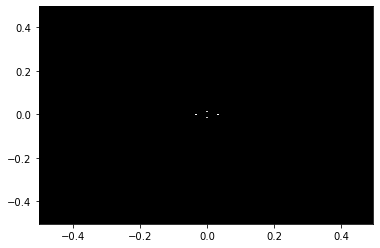

In [6]:
FZ = fft2(Z)
freqs = fftfreq(N, 1.)
FZ = fftshift(FZ)         # Shift values so that the center of the array has frequency 0
freqs = fftshift(freqs)
plt.pcolormesh(freqs, freqs, np.abs(FZ), cmap='gray')

(-0.1, 0.1)

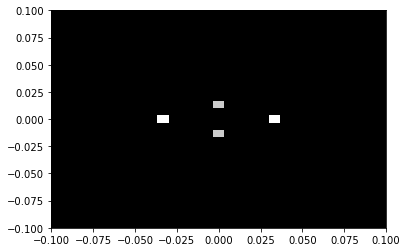

In [7]:
plt.pcolormesh(freqs, freqs, np.abs(FZ), cmap='gray')
plt.xlim((-0.1, 0.1))
plt.ylim((-0.1, 0.1))

(-0.1, 0.1)

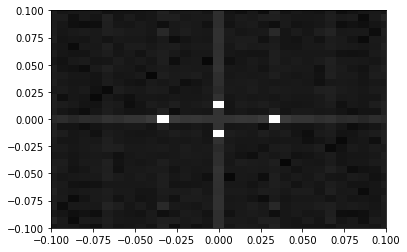

In [8]:
plt.pcolormesh(freqs, freqs, np.log(np.abs(FZ)), cmap='gray')
plt.xlim((-0.1, 0.1))
plt.ylim((-0.1, 0.1))

## 3. DFT 2D de imagens com repetição

In [9]:
def calc_fourier_and_plot(img):
    '''Calcula transformada de Fourier de uma imagem e plota o resultado'''
    num_rows, num_cols = img.shape

    Fimg = fft2(img)
    freq_r = fftfreq(num_rows)
    freq_c = fftfreq(num_cols)

    Fimg = fftshift(Fimg)
    freq_r = fftshift(freq_r)
    freq_c = fftshift(freq_c)
    plt.figure(figsize=[8,8])
    plt.pcolormesh(freq_c, freq_r, np.log(np.abs(Fimg)), cmap='gray')

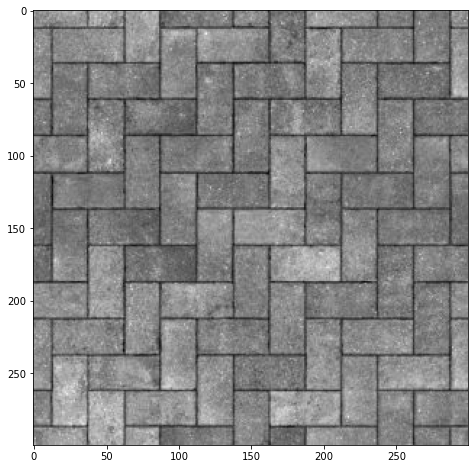

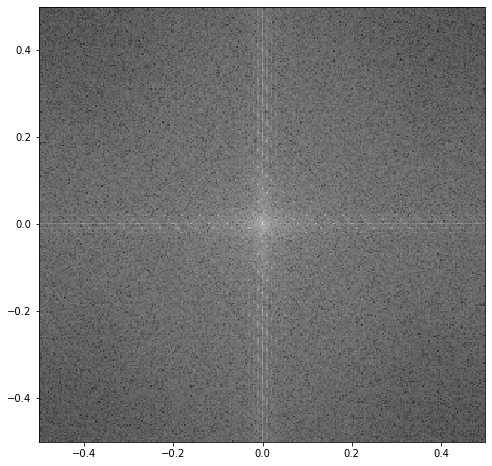

In [10]:
filename='tiles1.tiff'

img = plt.imread(filename)
plt.figure(figsize=[8,8])
plt.imshow(img, 'gray')

calc_fourier_and_plot(img)

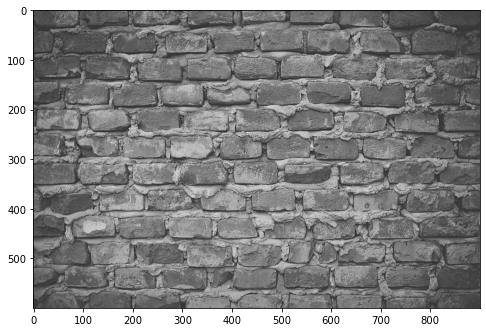

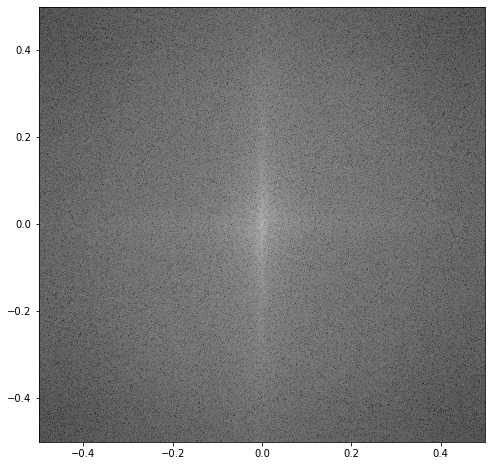

In [11]:
filename='tiles2.tiff'

img = plt.imread(filename)
plt.figure(figsize=[8,8])
plt.imshow(img, 'gray')

calc_fourier_and_plot(img)

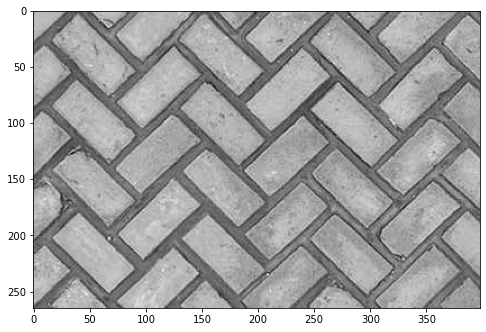

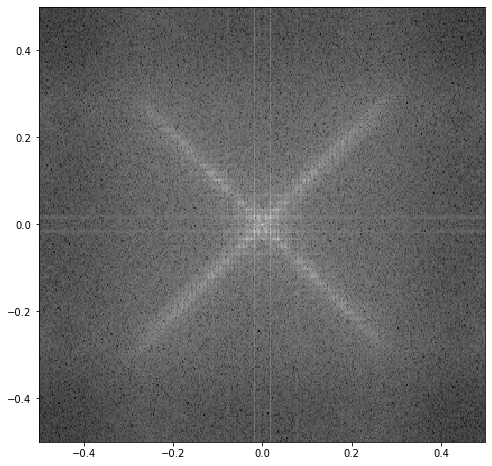

In [12]:
filename='tiles3.tiff'

img = plt.imread(filename)
plt.figure(figsize=[8,8])
plt.imshow(img, 'gray')

calc_fourier_and_plot(img)

## 4. DFT 2D de uma imagem qualquer

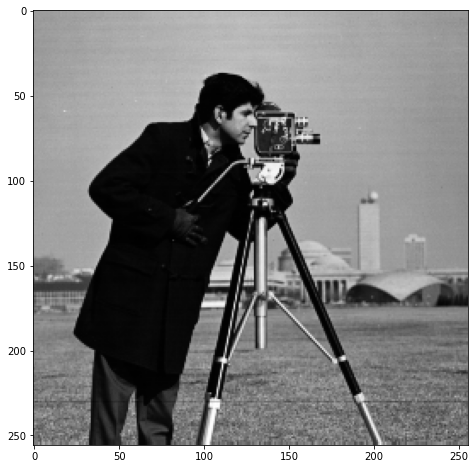

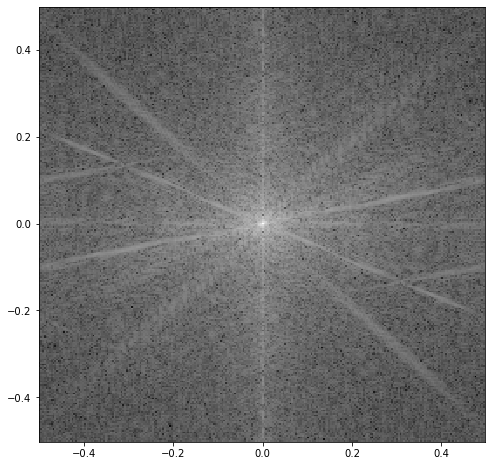

In [13]:
filename='cameraman.tiff'

img = plt.imread(filename)
plt.figure(figsize=[8,8])
plt.imshow(img, 'gray')

calc_fourier_and_plot(img)